In [ ]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud 
import numpy as np
import re
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/Bigtech - 20-09-2020 till 13-10-2020.csv')

In [ ]:
data1.shape

(266095, 15)

In [ ]:
data2=pd.read_csv('/content/drive/MyDrive/Bigtech - 12-07-2020 till 19-09-2020.csv')

In [ ]:
data2.shape

(866909, 15)

In [ ]:
data=data2.append(data1)

In [ ]:
data.shape

(1133004, 15)

In [ ]:
data['text']

0         Been on holiday so back now. Gonna try get som...
1         RT @NinjaParanoid: #AMD #Ryzen #3900x #rtx2070...
2         The Beast #StrixGA35 comes packed with Up to A...
3         Recently purchased everything for my first per...
4         RT @LinuxReviews: #Linux architect Linus Torva...
                                ...                        
266090    New vlog arrivals! Discover a lovely culture t...
266091    New Video is up. Finally showing my new Stream...
266092    NEW VIDEO!!   FRIEND v FRIEND CHALLENGE!!   ht...
266093    ‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...
266094    ‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...
Name: text, Length: 1133004, dtype: object

In [ ]:
df=pd.DataFrame(data['text'].astype(str))

In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['text'].apply(cleanTxt)

# Show the cleaned tweets
df

,text,Tweets
0,Been on holiday so back now. Gonna try get som...,Been on holiday so back now. Gonna try get som...
1,RT @NinjaParanoid: #AMD #Ryzen #3900x #rtx2070...,": AMD Ryzen 3900x rtx2070 nvidia 64 gigs, 144h..."
2,The Beast #StrixGA35 comes packed with Up to A...,The Beast StrixGA35 comes packed with Up to AM...
3,Recently purchased everything for my first per...,Recently purchased everything for my first per...
4,RT @LinuxReviews: #Linux architect Linus Torva...,": Linux architect Linus Torvalds: AVX512 Is ""A..."
...,...,...
266090,New vlog arrivals! Discover a lovely culture t...,New vlog arrivals! Discover a lovely culture t...
266091,New Video is up. Finally showing my new Stream...,New Video is up. Finally showing my new Stream...
266092,NEW VIDEO!! FRIEND v FRIEND CHALLENGE!! ht...,NEW VIDEO!! FRIEND v FRIEND CHALLENGE!! ...
266093,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity
# Create two new columns 'Polarity'
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,text,Tweets,Polarity
0,Been on holiday so back now. Gonna try get som...,Been on holiday so back now. Gonna try get som...,0.212121
1,RT @NinjaParanoid: #AMD #Ryzen #3900x #rtx2070...,": AMD Ryzen 3900x rtx2070 nvidia 64 gigs, 144h...",0.000000
2,The Beast #StrixGA35 comes packed with Up to A...,The Beast StrixGA35 comes packed with Up to AM...,0.000000
3,Recently purchased everything for my first per...,Recently purchased everything for my first per...,0.083333
4,RT @LinuxReviews: #Linux architect Linus Torva...,": Linux architect Linus Torvalds: AVX512 Is ""A...",-0.208333
...,...,...,...
266090,New vlog arrivals! Discover a lovely culture t...,New vlog arrivals! Discover a lovely culture t...,0.223485
266091,New Video is up. Finally showing my new Stream...,New Video is up. Finally showing my new Stream...,-0.005455
266092,NEW VIDEO!! FRIEND v FRIEND CHALLENGE!! ht...,NEW VIDEO!! FRIEND v FRIEND CHALLENGE!! ...,0.332919
266093,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,0.000000


In [ ]:
ds=df.loc[df['file_name'] =='Amazon' ]
ds.head()

# word cloud visualization
allWords = ' '.join([twts for twts in ds['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

KeyError: ignored

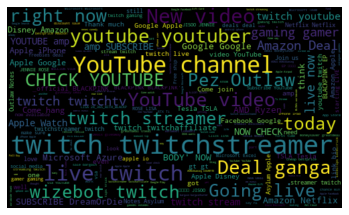

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,text,Tweets,Polarity,Analysis
0,Been on holiday so back now. Gonna try get som...,Been on holiday so back now. Gonna try get som...,0.212121,Positive
1,RT @NinjaParanoid: #AMD #Ryzen #3900x #rtx2070...,": AMD Ryzen 3900x rtx2070 nvidia 64 gigs, 144h...",0.000000,Neutral
2,The Beast #StrixGA35 comes packed with Up to A...,The Beast StrixGA35 comes packed with Up to AM...,0.000000,Neutral
3,Recently purchased everything for my first per...,Recently purchased everything for my first per...,0.083333,Positive
4,RT @LinuxReviews: #Linux architect Linus Torva...,": Linux architect Linus Torvalds: AVX512 Is ""A...",-0.208333,Negative
...,...,...,...,...
266090,New vlog arrivals! Discover a lovely culture t...,New vlog arrivals! Discover a lovely culture t...,0.223485,Positive
266091,New Video is up. Finally showing my new Stream...,New Video is up. Finally showing my new Stream...,-0.005455,Negative
266092,NEW VIDEO!! FRIEND v FRIEND CHALLENGE!! ht...,NEW VIDEO!! FRIEND v FRIEND CHALLENGE!! ...,0.332919,Positive
266093,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,0.000000,Neutral


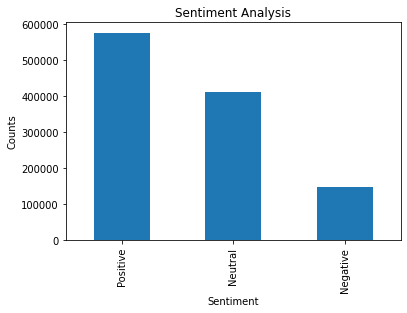

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

KeyboardInterrupt: ignored

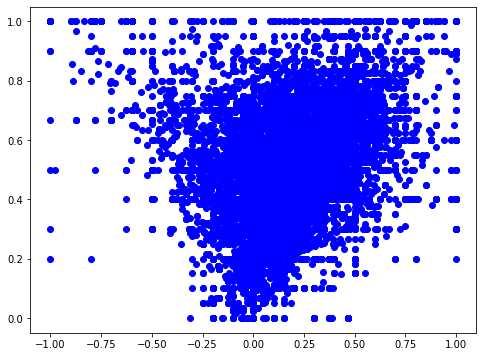

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
df['created_at']=data['created_at']
df['file_name']=data['file_name']
df

,text,Tweets,Polarity,Analysis,created_at,file_name
0,Been on holiday so back now. Gonna try get som...,Been on holiday so back now. Gonna try get som...,0.212121,Positive,2020-07-12 09:24:26,AMD
1,RT @NinjaParanoid: #AMD #Ryzen #3900x #rtx2070...,": AMD Ryzen 3900x rtx2070 nvidia 64 gigs, 144h...",0.000000,Neutral,2020-07-12 09:09:36,AMD
2,The Beast #StrixGA35 comes packed with Up to A...,The Beast StrixGA35 comes packed with Up to AM...,0.000000,Neutral,2020-07-12 08:37:31,AMD
3,Recently purchased everything for my first per...,Recently purchased everything for my first per...,0.083333,Positive,2020-07-12 08:31:24,AMD
4,RT @LinuxReviews: #Linux architect Linus Torva...,": Linux architect Linus Torvalds: AVX512 Is ""A...",-0.208333,Negative,2020-07-12 08:16:45,AMD
...,...,...,...,...,...,...
266090,New vlog arrivals! Discover a lovely culture t...,New vlog arrivals! Discover a lovely culture t...,0.223485,Positive,2020-10-03 23:54:59,Youtube
266091,New Video is up. Finally showing my new Stream...,New Video is up. Finally showing my new Stream...,-0.005455,Negative,2020-10-03 23:54:54,Youtube
266092,NEW VIDEO!! FRIEND v FRIEND CHALLENGE!! ht...,NEW VIDEO!! FRIEND v FRIEND CHALLENGE!! ...,0.332919,Positive,2020-10-03 23:54:53,Youtube
266093,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,0.000000,Neutral,2020-10-03 23:54:45,Youtube


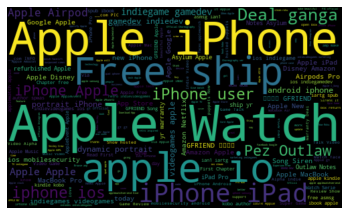

In [ ]:
ds=df.loc[df['file_name'] =='Apple' ]
ds.head()

# word cloud visualization
allWords = ' '.join([twts for twts in ds['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df['date'] =  pd.to_datetime(df['created_at'])

In [ ]:
df.drop(columns="created_at",inplace=True)


In [ ]:
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day


In [ ]:
df

,text,Tweets,Subjectivity,Polarity,Analysis,file_name,date,year,month,day
0,Been on holiday so back now. Gonna try get som...,Been on holiday so back now. Gonna try get som...,0.318182,0.212121,Positive,AMD,2020-07-12 09:24:26,2020,7,12
1,RT @NinjaParanoid: #AMD #Ryzen #3900x #rtx2070...,": AMD Ryzen 3900x rtx2070 nvidia 64 gigs, 144h...",0.000000,0.000000,Neutral,AMD,2020-07-12 09:09:36,2020,7,12
2,The Beast #StrixGA35 comes packed with Up to A...,The Beast StrixGA35 comes packed with Up to AM...,0.000000,0.000000,Neutral,AMD,2020-07-12 08:37:31,2020,7,12
3,Recently purchased everything for my first per...,Recently purchased everything for my first per...,0.294444,0.083333,Positive,AMD,2020-07-12 08:31:24,2020,7,12
4,RT @LinuxReviews: #Linux architect Linus Torva...,": Linux architect Linus Torvalds: AVX512 Is ""A...",0.641667,-0.208333,Negative,AMD,2020-07-12 08:16:45,2020,7,12
...,...,...,...,...,...,...,...,...,...,...
266090,New vlog arrivals! Discover a lovely culture t...,New vlog arrivals! Discover a lovely culture t...,0.401515,0.223485,Positive,Youtube,2020-10-03 23:54:59,2020,10,3
266091,New Video is up. Finally showing my new Stream...,New Video is up. Finally showing my new Stream...,0.621818,-0.005455,Negative,Youtube,2020-10-03 23:54:54,2020,10,3
266092,NEW VIDEO!! FRIEND v FRIEND CHALLENGE!! ht...,NEW VIDEO!! FRIEND v FRIEND CHALLENGE!! ...,0.454545,0.332919,Positive,Youtube,2020-10-03 23:54:53,2020,10,3
266093,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,0.000000,0.000000,Neutral,Youtube,2020-10-03 23:54:45,2020,10,3


In [ ]:
df.to_csv('tweets.csv') 

In [ ]:
df.to_csv('/content/drive/MyDrive/tweets.csv')

In [ ]:
#c=0
#for x,row in df.iterrows():
  #if(row['file_name']=='AMD'):
    #print(row['Tweets'])
    #ds.append({'Tweets':row['Tweets']}, ignore_index=True)
    #print("")
  #c=c+1
  #if c>10:
    #break

In [ ]:
ds['Tweets']

Series([], Name: Tweets, dtype: object)

In [ ]:

x=(df['file_name']=='Youtube')

In [ ]:
x

0         False
1         False
2         False
3         False
4         False
          ...  
266090     True
266091     True
266092     True
266093     True
266094     True
Name: file_name, Length: 1133004, dtype: bool

In [ ]:
stock=pd.read_csv('/content/drive/MyDrive/StockPrice.csv')

In [ ]:
stock

,Date,APPL,NFLX,GOOG,AMZN
0,7/13/2020,97.264999,567.979980,1550.000000,3251.060059
1,7/14/2020,94.839996,517.080017,1490.310059,3089.000000
2,7/15/2020,98.989998,516.299988,1523.130005,3080.229980
3,7/16/2020,96.562500,526.479980,1500.000000,2971.060059
4,7/17/2020,96.987503,494.869995,1521.619995,3009.000000
...,...,...,...,...,...
60,10/6/2020,115.699997,518.719971,1475.579956,3165.000000
61,10/7/2020,114.620003,518.000000,1464.290039,3135.000000
62,10/8/2020,116.250000,533.479980,1465.089966,3224.989990
63,10/9/2020,115.279999,537.830017,1494.699951,3210.000000


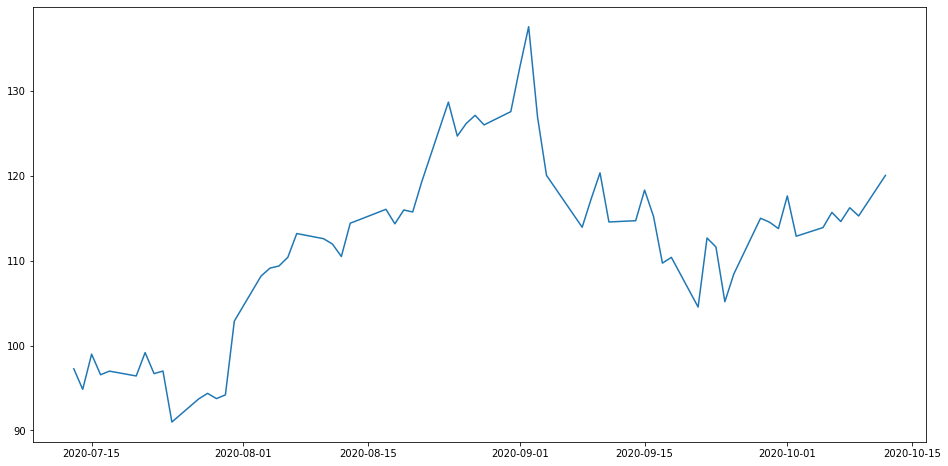

In [ ]:
#setting index as date
stock['Date'] = pd.to_datetime(stock.Date,format='%m/%d/%Y')
stock.index = stock['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(stock['APPL'], label='OPEN')

In [ ]:
#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

KeyError: ignored

In [ ]:
def getSIA(text):
  sia=SentimentIntensityAnalyzer()
  sentiment=sia.polarity_scores(text)
  return sentiment

In [ ]:
def perday_positivetweet(dataset):
  for x in range(len(df)):
    if df.date[x]
    